In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-05-21 15:46:34.153242


<h1>Yksinkertainen eksponentiaalinen tasoitus</h1>

Yksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa ei ole havaittavaa trendiä tai kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.

Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.

Eksponentiaalinen tasoitus löytyy <b>statsmodels.tsa</b>-kirjastosta.

Huomaa, että tässä esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

Lisätietoa https://tilastoapu.wordpress.com/2018/08/30/aikasarjaennustaminen-1/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')

<h2>Aikasarjaan tutustuminen</h2>

In [3]:
df = pd.read_excel('http://taanila.fi/aikasarja.xlsx')
df.head()

,Vuosineljännes,Kysyntä
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450


In [4]:
# Aikaleimat indeksiin
# to_datetime muuntaa merkkijonomuotoisen tiedon aikaleimoiksi
# format mahdollistaa erilaisten esitysmuotojen tunnistamisen aikaleimoiksi
df.index = pd.to_datetime(df['Vuosineljännes'], format = "%Y-%m-%d")

# Pudotetaan tarpeettomaksi käynyt sarake pois
df = df.drop('Vuosineljännes', axis = 1)
df.head()

,Kysyntä
Vuosineljännes,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450


<AxesSubplot:xlabel='Vuosineljännes'>

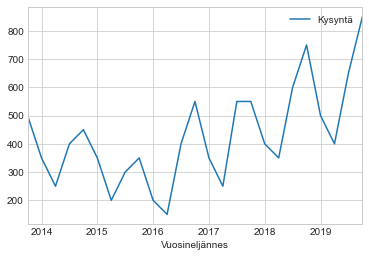

In [5]:
df.plot()

<h2>Mallin sovitus</h2>

Ennustemalli sovitetaan (<b>fit()</b>) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi <b>malli</b>), joka sisältää monenlaista tietoa mallista.

<b>freq</b>-parametrille käytän arvoa <b>'Q'</b>, koska kyseessä ovat vuosineljänneksien viimeiset päivät. Lisätietoa <b>freq</b>-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [6]:
malli = ExponentialSmoothing(df['Kysyntä'], freq = 'Q').fit()

In [7]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Ennuste'] = malli.fittedvalues
df

,Kysyntä,Ennuste
Vuosineljännes,,
2013-12-31,500,388.106006
2014-03-31,350,424.219757
2014-06-30,250,400.265354
2014-09-30,400,351.767258
2014-12-31,450,367.334361
2015-03-31,350,394.014670
2015-06-30,200,379.808949
2015-09-30,300,321.775667
2015-12-31,350,314.747578


<AxesSubplot:xlabel='Vuosineljännes'>

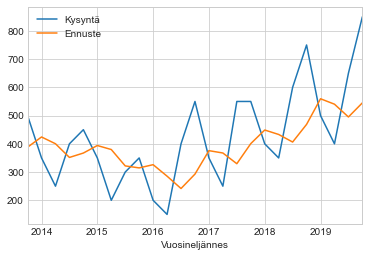

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2013-12-31,500,388.106006,111.893994
2014-03-31,350,424.219757,-74.219757
2014-06-30,250,400.265354,-150.265354
2014-09-30,400,351.767258,48.232742
2014-12-31,450,367.334361,82.665639
2015-03-31,350,394.014670,-44.014670
2015-06-30,200,379.808949,-179.808949
2015-09-30,300,321.775667,-21.775667
2015-12-31,350,314.747578,35.252422


<h2>Mallin tarkastelu</h2>

Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
<ul><li>ennustevirheiden aikasarjaa viivakaaviona</li>
    <li>ennusteiden ja toteutuneiden arvojen hajontakaaviota</li>
    <li>malliin liittyvää statistiikkaa, jonka saan <b>summary()</b>-toiminnolla.</li>
</ul>
Huomaa erityisesti <b>SSE</b> (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.

Text(0, 0.5, 'Ennustevirhe')

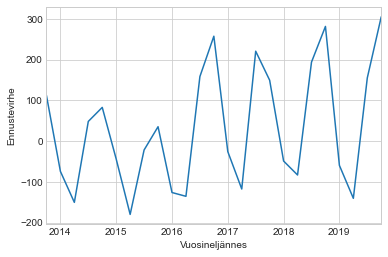

In [10]:
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

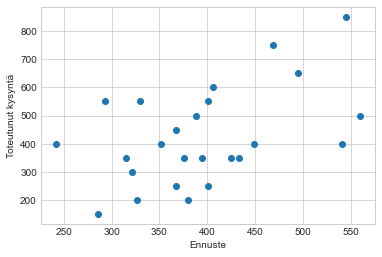

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Kysyntä'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
# Mallin statistiikkaa
malli.summary()

Dep. Variable:,Kysyntä,No. Observations:,25
Model:,ExponentialSmoothing,SSE,562690.236
Optimized:,True,AIC,254.540
Trend:,None,BIC,256.978
Seasonal:,None,AICC,256.540
Seasonal Periods:,None,Date:,"Fri, 21 May 2021"
Box-Cox:,False,Time:,15:46:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3227497,alpha,True
initial_level,388.10601,l.0,True


<h2>Ennusteiden laskeminen</h2>

Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
<ul><li>Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.</li>
    <li>Ennustettavien ajankohtien lukumäärän voin määrittää <b>periods</b>-parametrilla.</li>
    <li>Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty <b>freq</b>-parametrin arvo.</li></ul>
        
Lisätietoa <b>freq</b>-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [13]:
#Tarkistan viimeisen aikaleiman
df.tail()

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2018-12-31,750,468.808572,281.191428
2019-03-31,500,559.563017,-59.563017
2019-06-30,400,540.339072,-140.339072
2019-09-30,650,495.044681,154.955319
2019-12-31,850,545.056461,304.943539


In [14]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-03-31', periods = 8, freq = 'Q')

# Ennusteet kahdeksalle vuosineljännekselle
ennusteet = malli.forecast(8)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, columns = ['Ennuste'])
df_ennuste

,Ennuste
2020-03-31,643.476892
2020-06-30,643.476892
2020-09-30,643.476892
2020-12-31,643.476892
2021-03-31,643.476892
2021-06-30,643.476892
2021-09-30,643.476892
2021-12-31,643.476892


<AxesSubplot:xlabel='Vuosineljännes'>

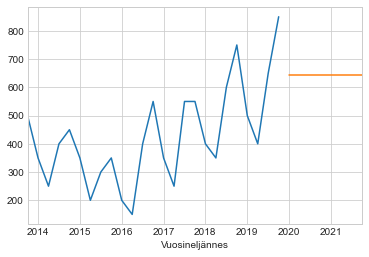

In [15]:
# Viivakaavio havainnoista
df['Kysyntä'].plot()

# Ennusteet kaavioon; huomaa, että yksinkertainen eksponentiaalinen tasoitus tuottaa vakioennusteen (suora viiva)
df_ennuste['Ennuste'].plot()

<h2>Lisätietoa</h2>

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/